In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [6]:
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.load("datafiles/proj.npy")
Y = dat["responses"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle = False) #Would be better 90/10

#Scale data?
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

coef_init = np.zeros(X.shape[1])

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1172, 2729)
y_train shape:  (1172, 8428)
X_test shape:  (578, 2729)
y_test shape:  (578, 8428)


In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

r2_list = []

reg = SGDRegressor(early_stopping = True, eta0 = 0.001, n_iter_no_change = 10, max_iter = 10000, shuffle = False, tol=1e-3, validation_fraction = 0.2)

for i in range(y_train.shape[1]): #for each voxel
    reg.fit(X_train, y_train[:,i], coef_init = coef_init)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test[:,i], y_pred)
    r2_list.append(r2)
    if (i % 100) == 0:
        print("Iteration: ", i, "/", y_train.shape[1])
    

Iteration:  0 / 8428
Iteration:  100 / 8428
Iteration:  200 / 8428
Iteration:  300 / 8428
Iteration:  400 / 8428
Iteration:  500 / 8428
Iteration:  600 / 8428
Iteration:  700 / 8428
Iteration:  800 / 8428
Iteration:  900 / 8428
Iteration:  1000 / 8428
Iteration:  1100 / 8428
Iteration:  1200 / 8428
Iteration:  1300 / 8428
Iteration:  1400 / 8428
Iteration:  1500 / 8428
Iteration:  1600 / 8428
Iteration:  1700 / 8428
Iteration:  1800 / 8428
Iteration:  1900 / 8428
Iteration:  2000 / 8428
Iteration:  2100 / 8428
Iteration:  2200 / 8428
Iteration:  2300 / 8428
Iteration:  2400 / 8428
Iteration:  2500 / 8428
Iteration:  2600 / 8428
Iteration:  2700 / 8428
Iteration:  2800 / 8428
Iteration:  2900 / 8428
Iteration:  3000 / 8428
Iteration:  3100 / 8428
Iteration:  3200 / 8428
Iteration:  3300 / 8428
Iteration:  3400 / 8428
Iteration:  3500 / 8428
Iteration:  3600 / 8428
Iteration:  3700 / 8428
Iteration:  3800 / 8428
Iteration:  3900 / 8428
Iteration:  4000 / 8428
Iteration:  4100 / 8428
Iter

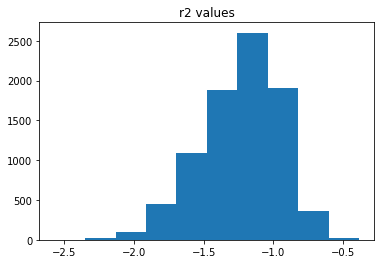

In [9]:
plt.hist(r2_list)
plt.title("r2 values")
plt.show()

In [25]:
best_500_ind = np.argpartition(r2_list, -500)[-500:]
best_vox = best_500_ind[0]
print(best_500_ind)
print("Least terrible voxel: ", best_vox)

[2733 7034  961 6450 4070 1702 7622 6698 3771 4782 7487  336 6303 2635
   11 7208 6795 7255 4883  331  855 3885 5994 6003 2426 1398 3414 3754
 6547  663 5333 2649 3640 2694 3621 2586 1949 6733 1912  458  421 6956
 1379 2388 1046 1588  255 2774 4469 3822  249 2007 1812 2712 7062 6736
 2699 1193 6342 5381 1580  382 5639 5228 6610 6179 4148  104   96 2000
 6480 6604 7365 1110 2353 4498  353  761 7537 1632   97 7782 7664  414
 7815 3825   40 6489 3374 8418 5753 4824 5147 5661 1481  332 3905 5793
 6444 1017 5122 2724 2403 2732 4889 1519 5106 6854 3667 5007  678 5708
 7431 6268   73  283 6270 2872 4997  185 2469 7047 1041 4902 3869 3230
 1554  836  102 6293  833 6111 1230  829 3745 8367 1082 3206 4668 4920
 3210 7727 4909 4396  479 5615  856 6028 1611 3266 1510 3181 1509  110
 5146 2681 4327 4825 7774  918 6571  147 5792 1988  188 5203  932  578
  951 7522 7994 3824 6343 4811 7517 7388 2023 4764  622  340 2265 5451
 1378 3638 1832 4068 7493 5366  683 1827 4690 5812 7483 6064 5415 7881
 6837 

In [21]:
reg.fit(X_train, y_train[:,best_vox], coef_init = coef_init)
y_pred = reg.predict(X_test)
print(y_test.shape)

(578, 8428)


In [23]:
print("True response: ", y_test[0][best_vox])
print("Predicted response: ", y_pred[0])

True response:  -0.9964937273990774
Predicted response:  0.05418902327149806


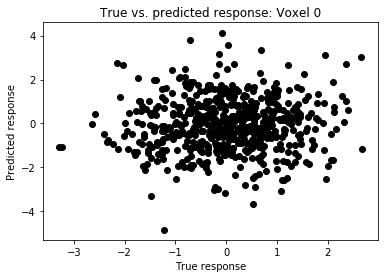

In [24]:
plt.scatter(y_test[:,best_vox], y_pred, color = "black")
plt.xlabel("True response")
plt.ylabel("Predicted response")
plt.title("True vs. predicted response: Voxel 0")
plt.show()

In [158]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test[:,0], y_pred)

print("R^2 score: ", r2)

R^2 score:  -0.7790106506050938
